## 1. INTRODUCTION
---------------------------------------------------
Name : Fajar Ibrah Muhammad

Dataset : heart_disease_health_indicators_BRFSS2015.csv

Objective : Heart Disease prediction menggunakan beberapa model, untuk mengevaluasi pembelajaran selama fase 1 FTDS.

----------------------------------------------------

### BACKGROUND CASE:
Saya adalah seorang Data Scientist yang bekerja untuk perusahaan teknologi kesehatan BitHeart. Saya diberi tugas untuk mengembangkan model prediktif yang dapat memprediksi apakah seseorang memiliki risiko akan mengalami serangan atau penyakit jantung.

## 2. IMPORT LIBRARIES

In [109]:
#import libraries

import pandas as pd
import numpy as np
from scipy import stats

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score

# data balancing
from imblearn.under_sampling import NearMiss

# data splitting
from sklearn.model_selection import train_test_split

# cross validation
from sklearn.model_selection import GridSearchCV

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scaling
from sklearn.preprocessing import StandardScaler

# outlier handling
from feature_engine.outliers import Winsorizer

# model saving
import pickle

from warnings import filterwarnings
filterwarnings('ignore')

## 3. DATA LOADING

### Columns Description

| Columns | Descriptions | Values |
| --- | --- | --- |
|HeartDiseaseorAttack |Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)|0:No, 1:Yes|
|HighBP|Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional|0:No, 1:Yes|
|HighChol |Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?|0:No, 1:Yes|
|CholCheck |Cholesterol check within past five years|0:No, 1:Yes|
|BMI |Body Mass Index (BMI)|1 or greater|
|Smoker |Have you smoked at least 100 cigarettes in your entire life?|0:No, 1:Yes|
|Stroke |(Ever told) you had a stroke.|0:No, 1:Yes|
|Diabetes |(Ever told) you have diabetes|0: No diabetes or only during pregnancy, 1:Pre-diabetes or borderline diabetes, 2:Yes diabetes|
|PhysActivity |Adults who reported doing physical activity or exercise during the past 30 days other than their regular job|0:No, 1:Yes|
|Fruits |Consume Fruit 1 or more times per day|0:No, 1:Yes|
|Veggies |Consume Vegetables 1 or more times per day|0:No, 1:Yes|
|HvyAlcoholConsump |Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|0:No, 1:Yes|
|AnyHealthcare |Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?|0:No, 1:Yes|
|NoDocbcCost |Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?|0:No, 1:Yes|
|GenHlth |Would you say that in general your health is|1:Excellent, 2:Very Good, 3:Good, 4:Fair, 5:Poor|  
|MentHlth |For how many days during the past 30 days was your mental health not good?|Number of days|
|PhysHlth |For how many days during the past 30 days was your physical health not good?|Number of days|
|DiffWalk |Do you have serious difficulty walking or climbing stairs?|0:No, 1:Yes|
|Sex |Indicate sex of respondent.|0:Female, 1:Male|
|Age |Fourteen-level age category|1 is 18-24 all the way up to 13 which is 80 and older. 5 year increments.|
|Education |What is the highest grade or year of school you completed?|1:Never attended school, 2:Grades 1 - 8 (Elementary), 3:Grades 9 - 11 (Some high school), 4:Grade 12 or GED (High school graduate), 5:College 1 - 3 years (Some college or technical school), 6:College 4 years or more (College graduate)
|Income |Your annual household income from all sources| 1:Less than $10.000, 2:$10.000 to less than $15.000, 3:$15.000 to less than $20.000, 4:$20.000 to less than $25.000, 5:$25.000 to less than $35.000, 6:$35.000 to less than $50.000, 7:$50.000 to less than $75.000, 8:$75.000 or more|







In [110]:
# load data raw
df_raw = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

df_raw

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


>Terlihat pada dataframe mentah bahwa terdapat sekitar 253680 data di dalam dataset yang digunakan, maka akan dilakukan pengurangan sample untuk menyingkat waktu komputasi model.

In [111]:
df = df_raw.copy()

In [112]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [114]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

> Dapat dilihat bahwa tidak terdapat data null value di dalam dataset yang akan digunakan. 

## 4. EDA

### 4.1 Bagaimana Korelasi Masing-masing Kolom Terhadap Heart Disease?

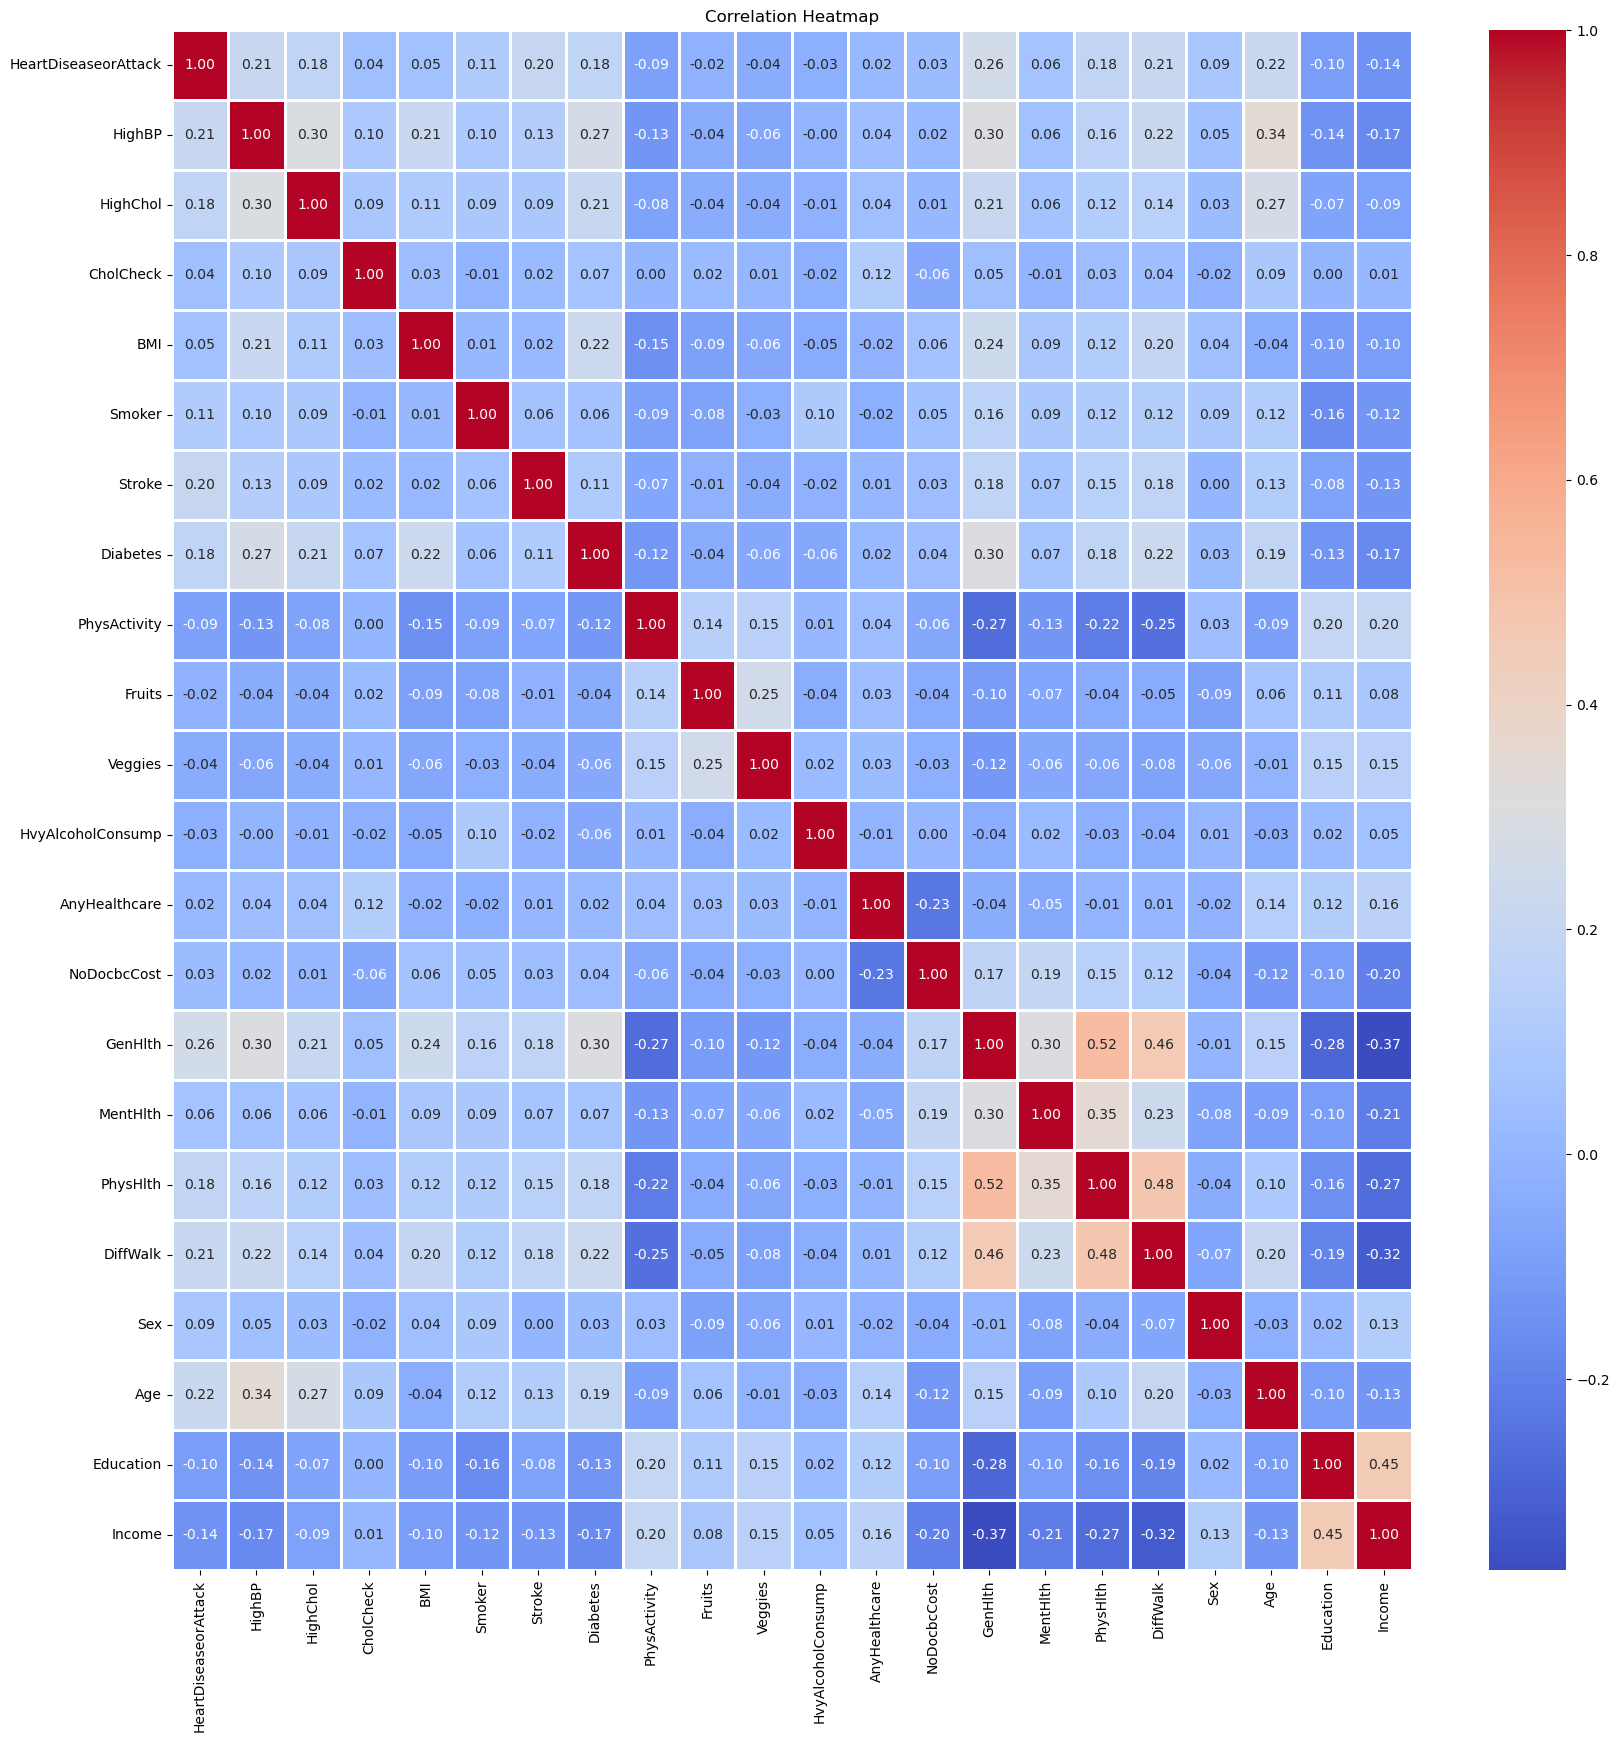

In [115]:
plt.figure(figsize=(20,20))
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",linewidths="1")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan Heatmap Korelasi setiap fitur dengan target yaitu HeartDiseaseorAttack, Dapat disimpulkan bahwa terdapat beberapa fitur yang memiliki korelasi dengan target. Namun berdasarkan nilai korelasi yang terlihat, tidak ada nilai korelasi yang termasuk besar dengan nilai korelasi terbesar terdapat pada fitur GenHlth (0.26). 

### 4.2 Bagaimana Distribusi HeartDiseaseorAttack Berdasarkan BMI?

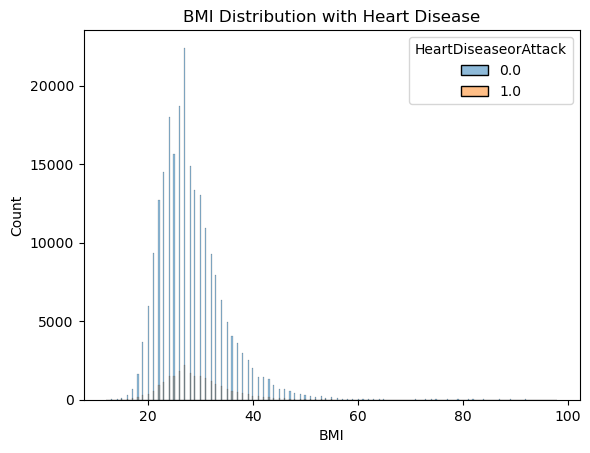

In [116]:
sns.histplot(x='BMI', data=df_raw, hue='HeartDiseaseorAttack')
plt.title("BMI Distribution with Heart Disease")
plt.show()

Berdasarkan distribusi data BMI (Body Mass Index) dan status penyakit jantung (0 untuk tidak ada penyakit jantung dan 1 untuk pernah didiagnosis dengan penyakit jantung), kita dapat menyimpulkan beberapa hal:

1. **Tren BMI:**
   - Distribusi BMI menunjukkan peningkatan seiring bertambahnya nilai BMI hingga mencapai puncaknya pada sekitar kelompok BMI 27, dan kemudian mengalami penurunan.

2. **Risiko Penyakit Jantung dan BMI:**
   - Terdapat korelasi positif antara nilai BMI dan risiko penyakit jantung, di mana individu dengan nilai BMI yang lebih tinggi memiliki kemungkinan lebih besar untuk memiliki penyakit jantung.

3. **Perhatian pada Kelompok BMI Tertentu:**
   - Penting untuk memperhatikan kelompok BMI yang memiliki jumlah kasus penyakit jantung yang signifikan, pada kelompok BMI sekitar 20 hingga 30. Hal ini dapat menjadi sinyal untuk perlu adanya intervensi kesehatan lebih lanjut pada kelompok tersebut.

4. **Kesimpulan Umum:**
   - Data menunjukkan bahwa BMI dapat menjadi faktor yang relevan dalam menilai risiko penyakit jantung.

Secara keseluruhan, temuan ini memberikan wawasan tentang hubungan antara BMI dan risiko penyakit jantung dalam populasi yang dianalisis.

### 4.3 Bagaimana Distribusi Data Heart Disease Berdasarkan Age Group?

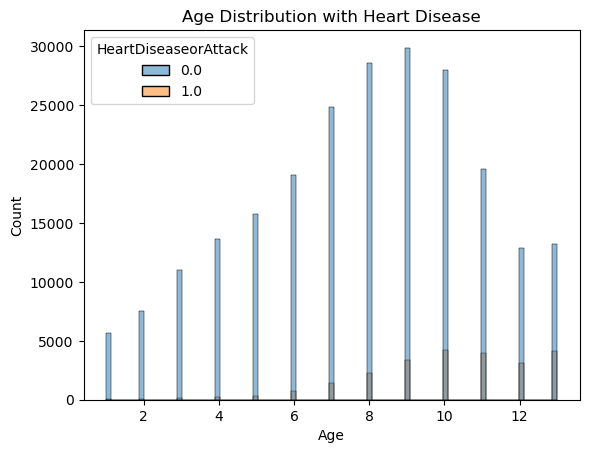

In [117]:
sns.histplot(x='Age', data=df_raw, hue='HeartDiseaseorAttack')
plt.title("Age Distribution with Heart Disease")
plt.show()

Visualisasi data diatas mencerminkan distribusi individu berdasarkan status penyakit jantung (0 untuk tidak ada penyakit jantung dan 1 untuk pernah didiagnosis dengan penyakit jantung) dan kelompok usia yang telah dikelompokkan, dimulai dari kelompok usia 1 (18-24 tahun) hingga kelompok usia 13 (80 tahun ke atas) dengan interval usia 5 tahun. Berikut adalah kesimpulan dari distribusi data ini:

1. **Pola Penyakit Jantung Berdasarkan Kelompok Usia:**
   - Terdapat peningkatan yang nyata dalam jumlah individu yang pernah didiagnosis dengan penyakit jantung (HeartDiseaseorAttack=1) seiring bertambahnya kelompok usia.
   - Puncak jumlah terlihat pada kelompok usia 10 (65-69 tahun), menunjukkan bahwa resiko penyakit jantung cenderung meningkat dengan bertambahnya usia.

2. **Perbandingan Jumlah Individu:**
   - Secara umum, jumlah individu tanpa penyakit jantung (HeartDiseaseorAttack=0) jauh lebih besar dibandingkan dengan mereka yang memiliki penyakit jantung (HeartDiseaseorAttack=1) dalam setiap kelompok usia.

3. **Analisis Kelompok Usia:**
   - Pada kelompok usia yang lebih muda (1-5), jumlah individu tanpa penyakit jantung lebih dominan, tetapi seiring bertambahnya usia, perbandingannya mulai menurun.

5. **Kesimpulan Umum:**
   - Berdasarkan data ini, dapat disimpulkan bahwa risiko penyakit jantung meningkat seiring bertambahnya usia.
   - Jumlah individu dengan penyakit jantung lebih signifikan pada kelompok usia yang lebih tua.

Dengan demikian, data menunjukkan bahwa penyakit jantung memiliki keterkaitan yang signifikan dengan kelompok usia, dengan risiko yang lebih tinggi terjadi pada kelompok usia yang lebih tua.

### 4.4 Bagaimana Distribusi Heart Disease Berdasarkan Tiap Gender?

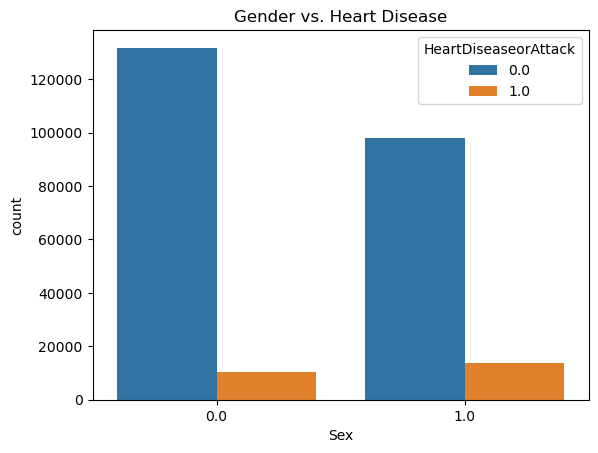

In [118]:
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df_raw)
plt.title("Gender vs. Heart Disease")
plt.show()

Visualisasi data diatas merepresentasikan distribusi individu berdasarkan status penyakit jantung (0 untuk tidak ada penyakit jantung dan 1 untuk pernah didiagnosis dengan penyakit jantung) dan jenis kelamin (0 untuk perempuan dan 1 untuk laki-laki). kesimpulan dari data ini adalah:

1. **Distribusi Penyakit Jantung:**
   - Jumlah individu tanpa penyakit jantung jauh lebih tinggi daripada mereka yang memiliki penyakit jantung.

2. **Distribusi Jenis Kelamin:**
   - Ada lebih banyak individu dari kedua jenis kelamin tanpa penyakit jantung (HeartDiseaseorAttack=0) dibandingkan dengan yang memiliki penyakit jantung (HeartDiseaseorAttack=1).

3. **Penyakit Jantung Berdasarkan Jenis Kelamin:**
   - Melihat pembagian berdasarkan jenis kelamin:
      - Di antara perempuan (Sex=0), ada lebih banyak individu tanpa penyakit jantung (HeartDiseaseorAttack=0) dibandingkan dengan yang memiliki penyakit jantung (HeartDiseaseorAttack=1).
      - Di antara laki-laki (Sex=1), ada lebih banyak individu tanpa penyakit jantung (HeartDiseaseorAttack=0) dibandingkan dengan yang memiliki penyakit jantung (HeartDiseaseorAttack=1).

4. **Kesimpulan Keseluruhan:**
   - Sebagian besar individu dalam dataset tidak memiliki riwayat penyakit jantung.
   - Jumlah data tanpa penyakit jantung lebih tinggi pada perempuan maupun laki-laki dibandingkan dengan yang memiliki penyakit jantung.
   - Analisis awal ini menunjukkan bahwa jenis kelamin saja mungkin bukan faktor penentu dalam kejadian penyakit jantung dalam dataset yang diberikan.

### 4.5 Bagaimana Persebaran Data Smoker Berdasarkan Age Group?

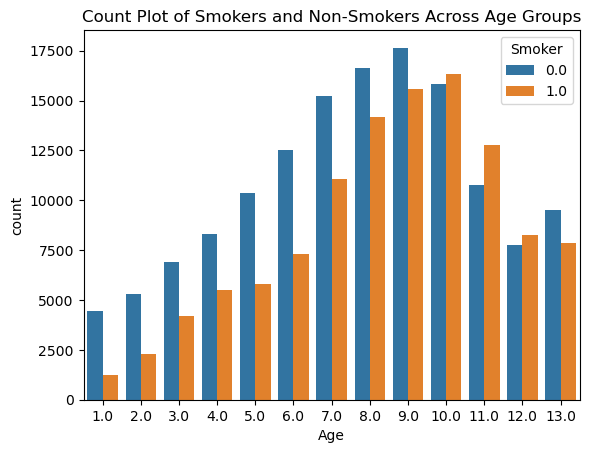

In [119]:
sns.countplot(x='Age', hue='Smoker', data=df_raw)
plt.title("Count Plot of Smokers and Non-Smokers Across Age Groups")
plt.show()

Visualisasi diatas mewakili jumlah individu berdasarkan usia, status perokok (0 untuk bukan perokok dan 1 untuk perokok), dan jumlah individu yang sesuai dalam setiap kategori. Jika kita analisa distribusinya kita dapat asumsikan:

1. **Usia dan Status Perokok:**
   - Seiring bertambahnya usia, baik jumlah bukan perokok maupun perokok cenderung meningkat. Namun ada penurunan signifikan setelah kategori usia 10, yaitu usia antar 65 sampai 69 tahun.

2. **Bukan Perokok vs. Perokok:**
   - Jumlah bukan perokok (0) secara konsisten lebih tinggi daripada perokok (1) kecuali di kelompok usia 10, 11, dan 12.
   - Ini menunjukkan bahwa, dalam populasi yang diberikan, ada lebih banyak bukan perokok daripada perokok.

3. **Kelompok Usia dengan Tingkat Merokok Tinggi:**
   - Kelompok usia 6, 7, 8, dan 9 tampaknya memiliki jumlah yang relatif lebih tinggi baik untuk bukan perokok maupun perokok dibandingkan dengan kelompok usia yang lainnya.
   - Ini bisa menunjukkan bahwa individu di kelompok usia ini lebih cenderung merokok.

## 5. FEATURE ENGINEERING

In [120]:
# copy df
df_copy = df.copy()

df_copy.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### 5.1 Correlation Search

In [121]:
# memisahkan kolom kategorikal dan numerical
num_corr = ['BMI', 'MentHlth', 'PhysHlth', 'HeartDiseaseorAttack']
cat_corr = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education',
       'Income', 'HeartDiseaseorAttack']

df_num_corr = df_copy[num_corr]
df_cat_corr = df_copy[cat_corr]

#### 5.1.1 Numeric

<Axes: >

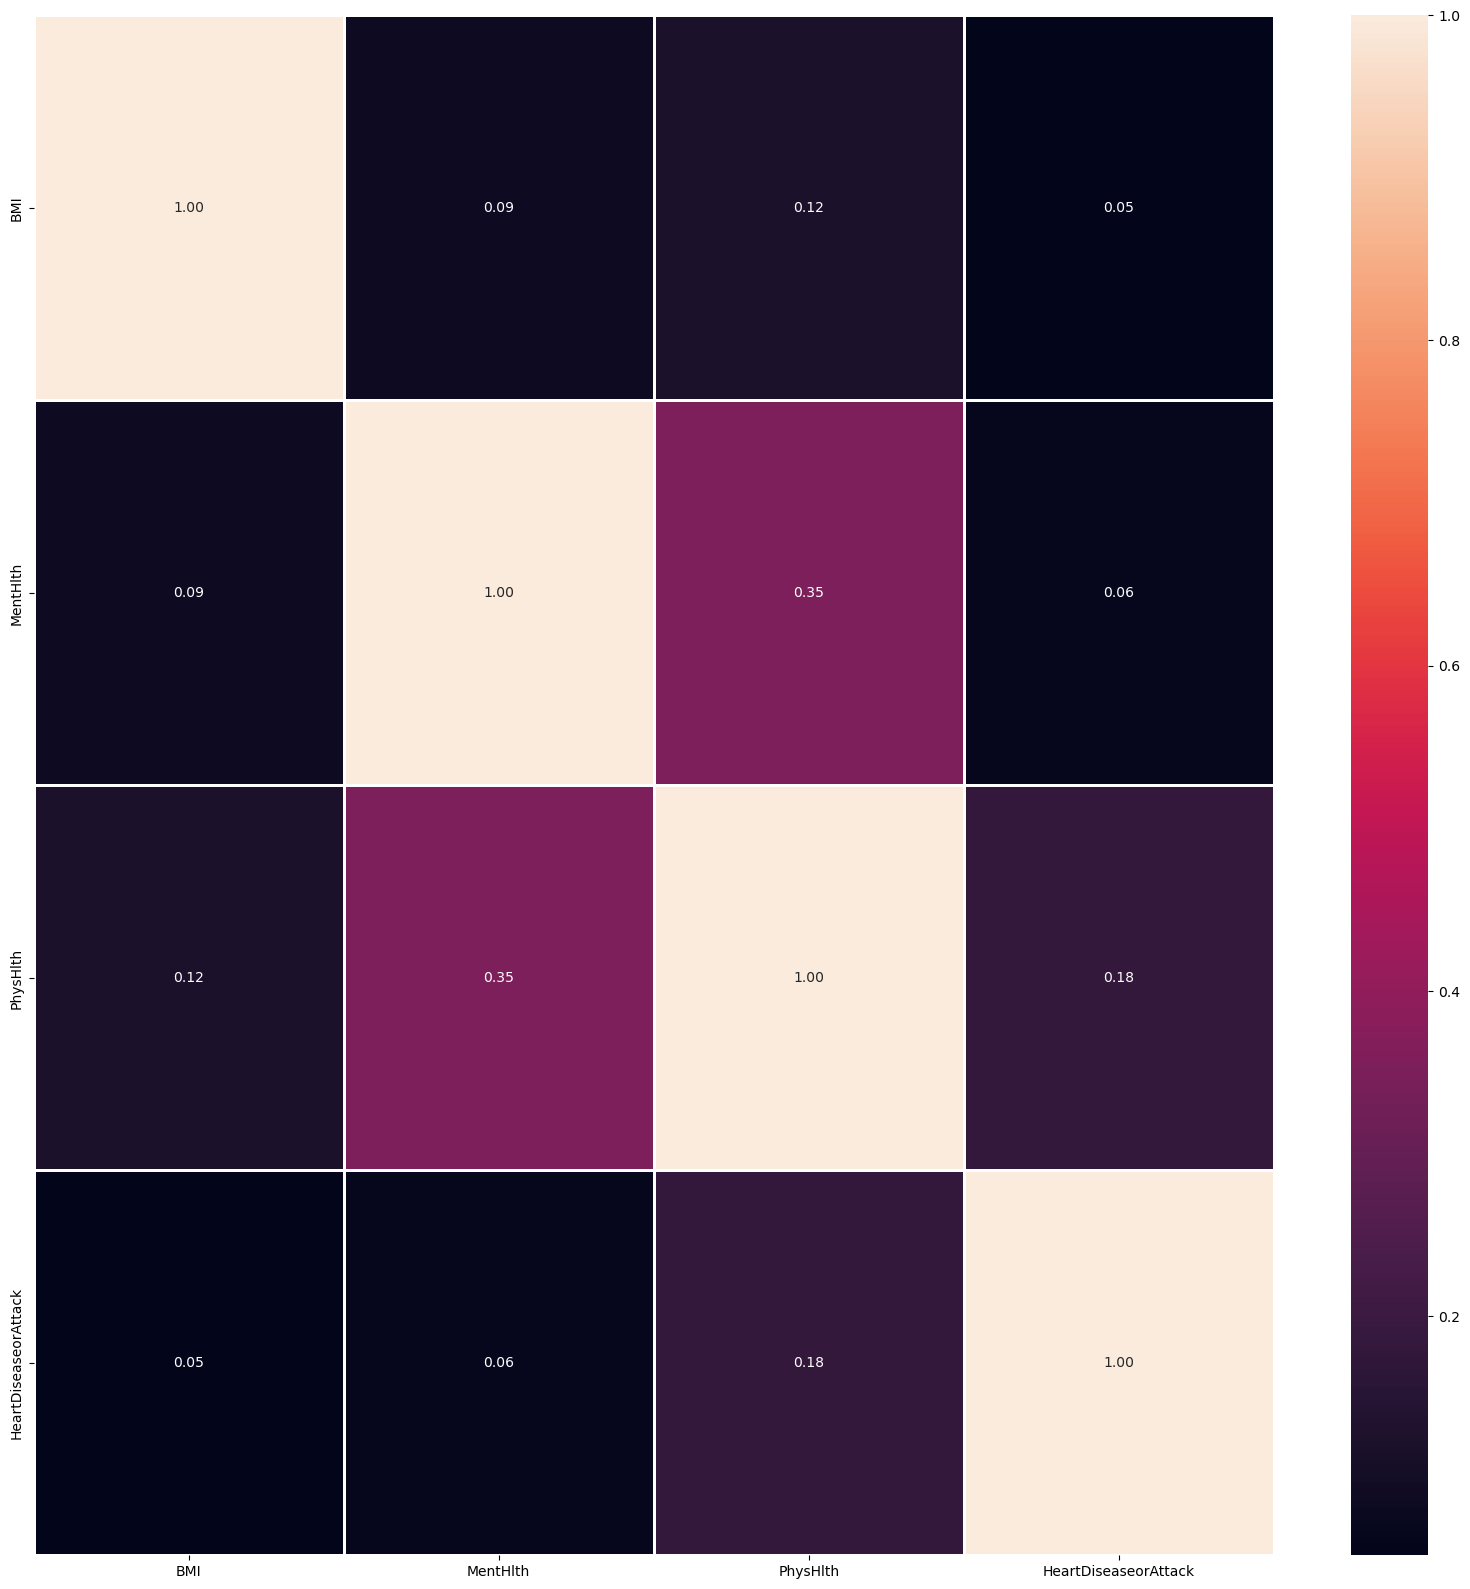

In [122]:
# Uji Pearson
plt.figure(figsize=(20,20))
sns.heatmap(df_num_corr.corr(method='pearson'),annot=True,fmt=".2f",linewidths="1")

> Berdasarkan Uji korelasi pearson diatas, ditemukan bahwa fitur numerikal dengan nilai korelasi yang cukup (>0.1) hanyalah fitur PhysHlth, namun berdasarkan artikel pada halaman web(https://www.hopkinsmedicine.org/health/wellness-and-prevention/weight-a-silent-heart-risk#:~:text=They%20found%20that%20higher%20BMI,developed%20the%20most%20heart%20failure.). Ditemukan bahwa BMI yang lebih tinggi sangat terkait dengan tingkat troponin yang lebih tinggi. Selama 12 tahun, orang-orang yang paling gemuk (BMI 35 atau lebih tinggi) paling banyak mengalami gagal jantung. Maka BMI juga menjadi fitur yang akan digunakan. 



#### 5.1.2 Categorical

<Axes: >

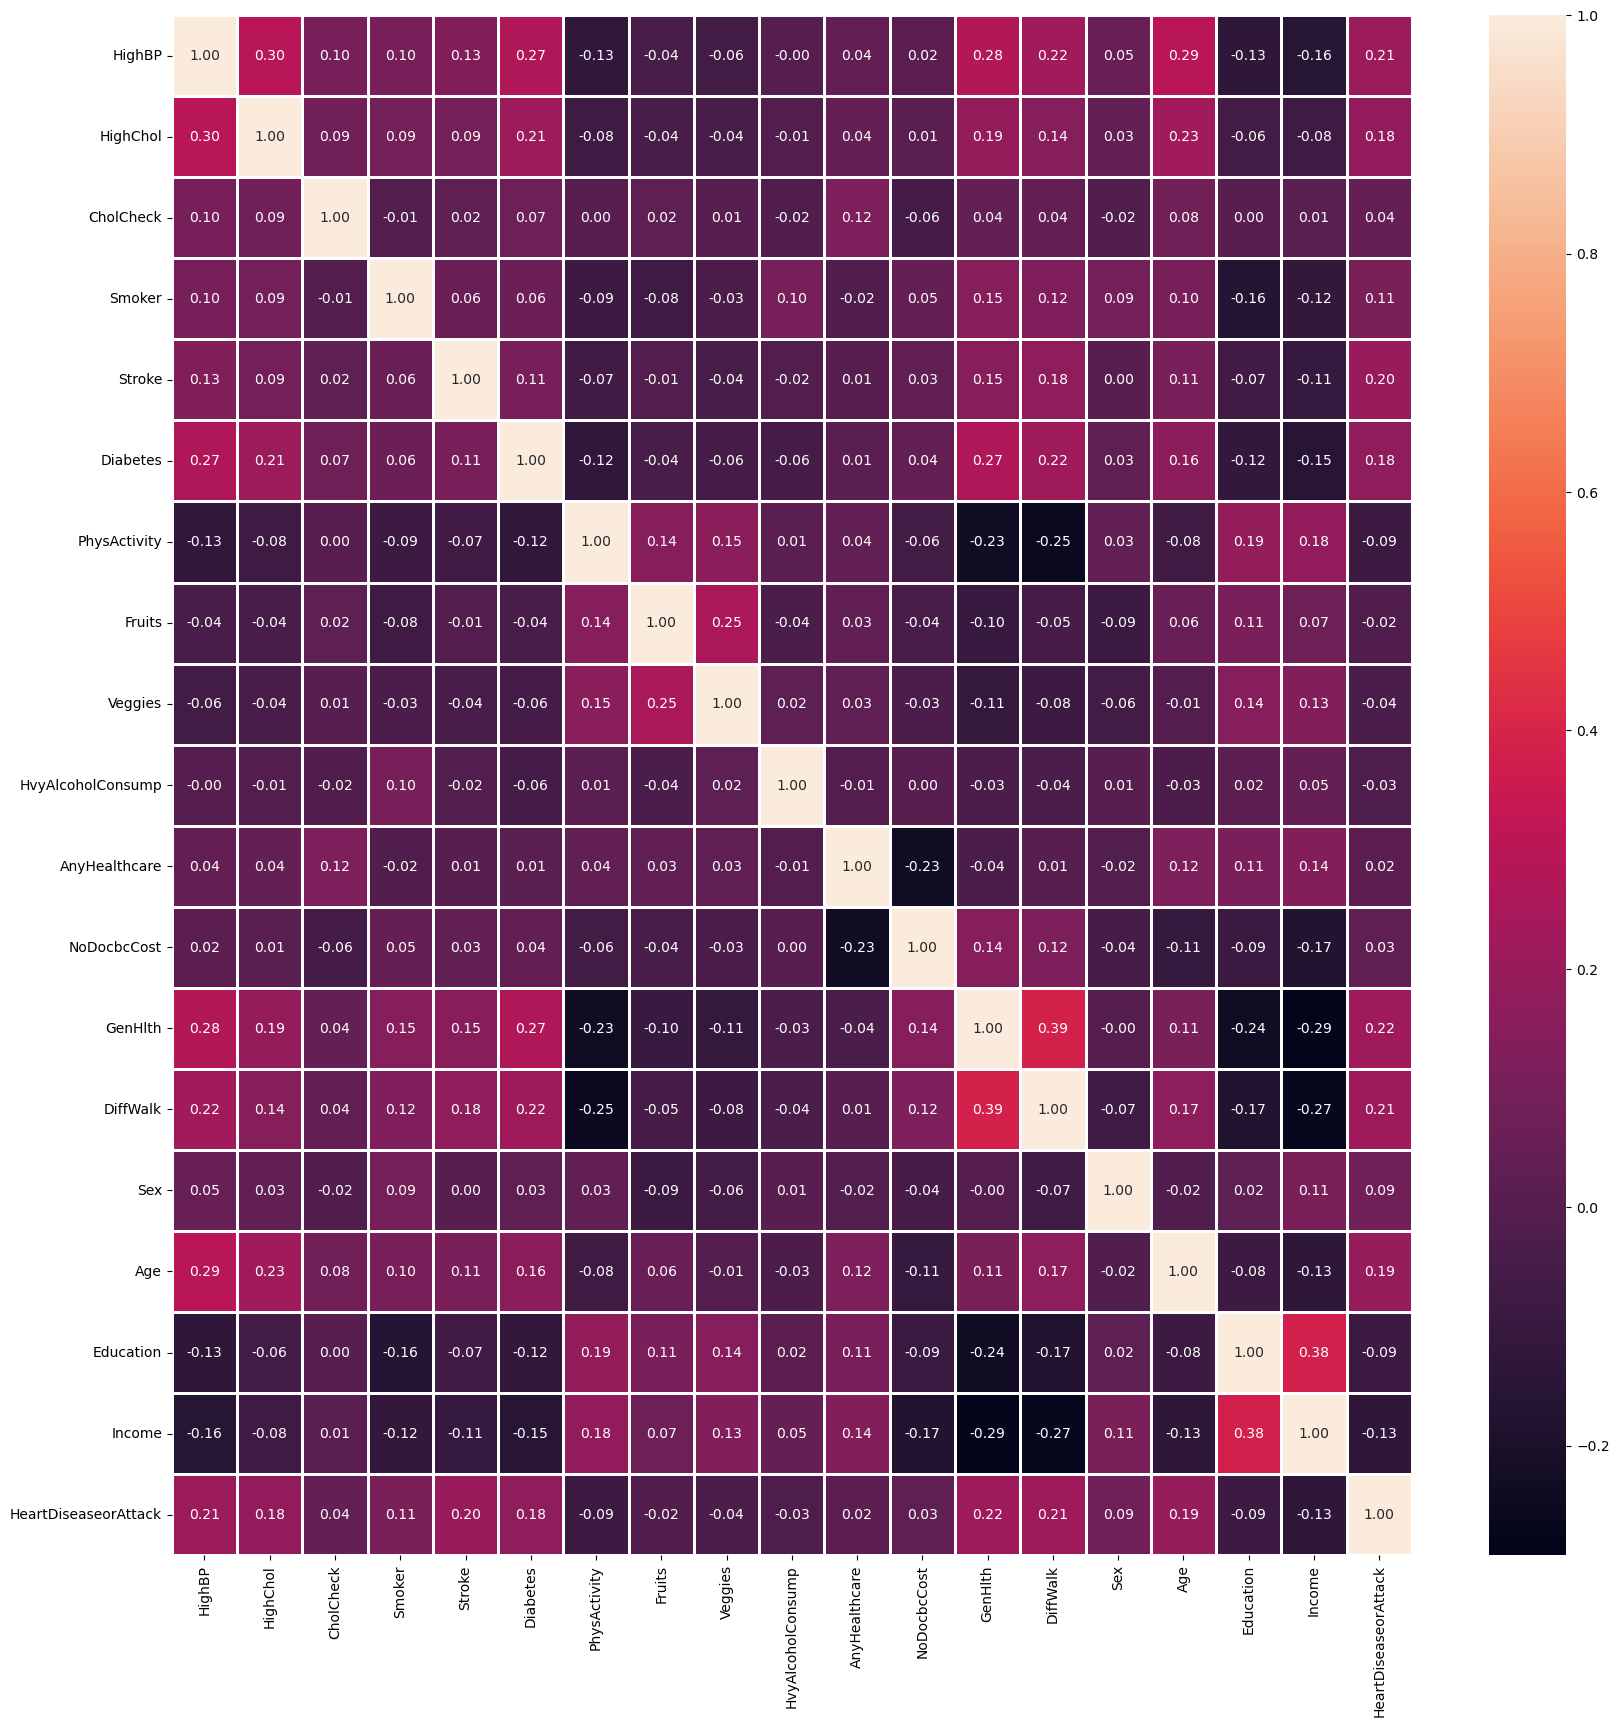

In [123]:
# Uji Kendall
plt.figure(figsize=(20,20))
sns.heatmap(df_cat_corr.corr(method='kendall'),annot=True,fmt=".2f",linewidths="1")

> Berdasarkan Uji Korelasi Kendall yang telah dilakukan, terdapat beberapa fitur kategorikal yang dinyatakan memiliki nilai korelasi yang cukup (>0.1) untuk dipilih menjadi fitur, yaitu HighBP, HighChol, Smoker, Stroke, Diabetes, GenHlth, DiffWalk, Age, dan Income.

### 5.2 Slicing

In [124]:
# slicing sesuai dengan feature yang diambil
df_select = df_copy[['HighBP', 'BMI', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'DiffWalk', 'Age', 'Income', 'PhysHlth', 'HeartDiseaseorAttack']]

df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   BMI                   253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   Smoker                253680 non-null  float64
 4   Stroke                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   GenHlth               253680 non-null  float64
 7   DiffWalk              253680 non-null  float64
 8   Age                   253680 non-null  float64
 9   Income                253680 non-null  float64
 10  PhysHlth              253680 non-null  float64
 11  HeartDiseaseorAttack  253680 non-null  float64
dtypes: float64(12)
memory usage: 23.2 MB


### 5.3 Cardinality Check

In [125]:
# cek jumlah unique value kolom kategorikal
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df_select:
  listItem.append([col, df_select[col].nunique(), df_select[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,HighBP,2,"[1.0, 0.0]"
1,BMI,84,"[40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26.0, 33.0, 21.0, 23.0, 22.0, 38.0, 32.0, 37.0, 31.0, 29.0, 20.0, 35.0, 45.0, 39.0, 19.0, 47.0, 18.0, 36.0, 43.0, 55.0, 49.0, 42.0, 17.0, 16.0, 41.0, 44.0, 50.0, 59.0, 48.0, 52.0, 46.0, 54.0, 57.0, 53.0, 14.0, 15.0, 51.0, 58.0, 63.0, 61.0, 56.0, 74.0, 62.0, 64.0, 66.0, 73.0, 85.0, 60.0, 67.0, 65.0, 70.0, 82.0, 79.0, 92.0, 68.0, 72.0, 88.0, 96.0, 13.0, 81.0, 71.0, 75.0, 12.0, 77.0, 69.0, 76.0, 87.0, 89.0, 84.0, 95.0, 98.0, 91.0, 86.0, 83.0, 80.0, 90.0, 78.0]"
2,HighChol,2,"[1.0, 0.0]"
3,Smoker,2,"[1.0, 0.0]"
4,Stroke,2,"[0.0, 1.0]"
5,Diabetes,3,"[0.0, 2.0, 1.0]"
6,GenHlth,5,"[5.0, 3.0, 2.0, 4.0, 1.0]"
7,DiffWalk,2,"[1.0, 0.0]"
8,Age,13,"[9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2.0, 12.0, 5.0, 1.0, 3.0]"
9,Income,8,"[3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]"


> Tidak ada fitur kategorikal yang bersifat High Cardinality

### 5.4 Data Splitting

In [126]:
# Split data
X = df_select.drop(['HeartDiseaseorAttack'], axis=1)
y = df_select['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42, stratify=y)

print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")

Shape data train : (228312, 11)
Shape data test : (25368, 11)


### 5.5 Multicolinearity (VIF)

In [127]:
# Membuat fungsi untuk pengujian nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [128]:
calc_vif(X_train)

,variables,VIF
0,HighBP,2.284826
1,BMI,13.683053
2,HighChol,2.027755
3,Smoker,1.858250
4,Stroke,1.106739
5,Diabetes,1.392099
6,GenHlth,9.791146
7,DiffWalk,1.795489
8,Age,7.807607
9,Income,7.780450


> Berdasarkan nilai VIF yang didapatkan memang seharusnya fitur dengan nilai VIF > 10 tidak diambil, namun 4 dari 5 model yang akan digunakan untuk training tidak memiliki asumsi linear, maka nilai ini hanya akan dijadikan konsiderasi.

### 5.6 Outlier Handling

In [129]:
print(f"Mean = {X_train['PhysHlth'].mean()}")
print(f"Median = {X_train['PhysHlth'].median()}")
print(f"Modus = {X_train['PhysHlth'].mode()[0]}")

print(f"Skew = {X_train['PhysHlth'].skew()}")

Mean = 4.2256999194085285
Median = 0.0
Modus = 0.0
Skew = 2.2143843850351232


In [130]:
print(f"Mean = {X_train['BMI'].mean()}")
print(f"Median = {X_train['BMI'].median()}")
print(f"Modus = {X_train['BMI'].mode()[0]}")

print(f"Skew = {X_train['BMI'].skew()}")

Mean = 28.383444584603524
Median = 27.0
Modus = 27.0
Skew = 2.123996782973163


> Dikarenakan kedua fitur diatas memiliki nilai skewness > 1 yang berarti bersifat extreme, maka metode caaping winsorizer akan menggunakan fold=3

<Axes: >

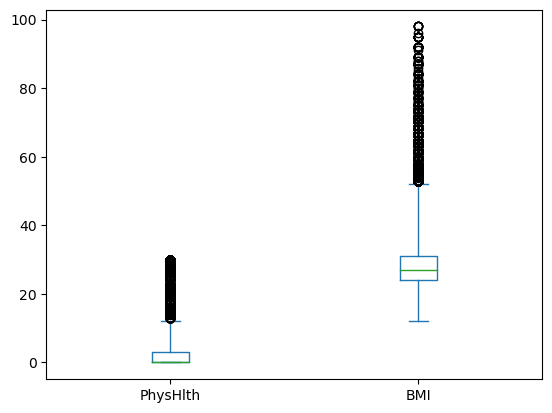

In [131]:
# membuat boxplot sebelum handling outlier
X_train[['PhysHlth','BMI']].plot(kind='box', whis=3)

In [133]:
#capping menggunakan modul winsorizer
wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['PhysHlth', 'BMI'] )
X_train = wz.fit_transform(X_train)

<Axes: >

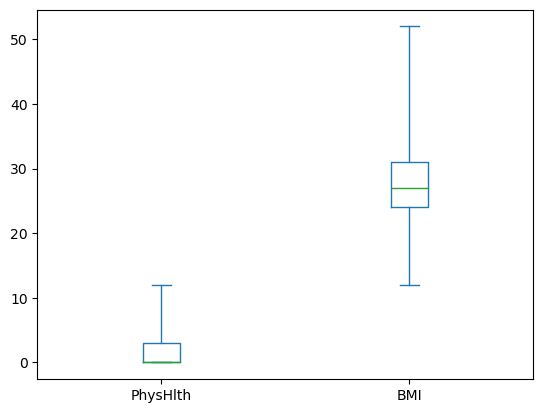

In [134]:
# membuat boxplot setelah handling outlier
X_train[['PhysHlth','BMI']].plot(kind='box', whis=3)

### 5.7 Data Balancing

In [135]:
y_train.value_counts(normalize=True) * 100

HeartDiseaseorAttack
0.0    90.58131
1.0     9.41869
Name: proportion, dtype: float64

> Terlihat bahwa distribusi kelas pada kolom target bersifat imbalance, maka akan dilakukan balancing (undersampling) menggunakan metode NearMiss.

In [136]:
# undersampling with NearMiss

nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train)
y_train.value_counts()

HeartDiseaseorAttack
0.0    21504
1.0    21504
Name: count, dtype: int64

In [137]:
X_train.shape

(43008, 11)

In [138]:
X_test.shape

(25368, 11)

In [139]:
X_train

,HighBP,BMI,HighChol,Smoker,Stroke,Diabetes,GenHlth,DiffWalk,Age,Income,PhysHlth
0,0.0,23.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,8.0,0.0
1,0.0,31.0,1.0,0.0,0.0,0.0,2.0,0.0,8.0,8.0,0.0
2,1.0,28.0,1.0,0.0,0.0,0.0,3.0,0.0,10.0,6.0,0.0
3,0.0,25.0,1.0,0.0,0.0,0.0,2.0,0.0,10.0,8.0,0.0
4,1.0,26.0,1.0,1.0,0.0,0.0,3.0,0.0,11.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43003,1.0,29.0,0.0,1.0,0.0,0.0,4.0,1.0,13.0,2.0,12.0
43004,1.0,21.0,1.0,1.0,0.0,0.0,3.0,0.0,10.0,2.0,5.0
43005,1.0,32.0,0.0,1.0,0.0,0.0,4.0,0.0,11.0,2.0,0.0
43006,1.0,29.0,1.0,1.0,1.0,2.0,5.0,1.0,10.0,1.0,12.0


### 5.8 Scaling

In [140]:
# pipeline untuk preprocessing
num_cols = ['PhysHlth', 'BMI']
cat_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'DiffWalk', 'Age', 'Income']

num_transformer = Pipeline(steps= [
    ("scaler", StandardScaler())
    ])

preprocessing = ColumnTransformer(
    transformers=[
    ('num', num_transformer, num_cols)],
    remainder='passthrough')

## 6. MODEL DEFINITION

### KNN

In [141]:
pipe_knn = Pipeline([('preprocessor', preprocessing), ('knn', KNeighborsClassifier())])

**K-Nearest Neighbors (KNN):**
   - **Konsep Dasar:** KNN memprediksi kelas suatu observasi berdasarkan mayoritas kelas dari k tetangga terdekatnya di dalam ruang fitur.
   - **Kelebihan:** Sederhana, mudah diimplementasikan.
   - **Kekurangan:** Sensitif terhadap pencilan, membutuhkan perhitungan jarak antar data.

### SVM

In [142]:
pipe_svm = Pipeline([('preprocessor', preprocessing), ('svm', SVC(random_state=42))])

 **Support Vector Machine (SVM):**
   - **Konsep Dasar:** SVM mencari hiperplane terbaik yang memisahkan dua kelas dalam ruang fitur dengan margin maksimal.
   - **Kelebihan:** Efektif dalam ruang fitur berdimensi tinggi, mampu menangani data yang tidak linier dengan menggunakan kernel.
   - **Kekurangan:** Kinerja dapat menurun pada dataset besar.

### Decision Tree

In [143]:
pipe_dt = Pipeline([('preprocessor', preprocessing), ('dt', DecisionTreeClassifier(random_state=42))])

**Decision Tree:**
   - **Konsep Dasar:** Decision tree membuat keputusan dengan mengajukan serangkaian pertanyaan dan membagi dataset berdasarkan jawaban.
   - **Kelebihan:** Mudah diinterpretasi, tidak memerlukan pra-pemrosesan data yang kompleks.
   - **Kekurangan:** Rentan terhadap overfitting, keputusan yang terlalu kompleks.

### Random Forest

In [144]:
pipe_rf = Pipeline([('preprocessor', preprocessing), ('rf', RandomForestClassifier(random_state=42))])

**Random Forest:**
   - **Konsep Dasar:** Random Forest adalah kumpulan pohon keputusan yang dihasilkan secara acak. Hasil klasifikasi diambil dari mayoritas suara pohon.
   - **Kelebihan:** Mengurangi overfitting, tahan terhadap noise dan outlier.
   - **Kekurangan:** Sulit untuk diinterpretasi dibandingkan dengan decision tree tunggal.

### XGBoost

In [145]:
pipe_xg = Pipeline([('preprocessor', preprocessing), ('xg', XGBClassifier(random_state=42))])

**XGBoost (Extreme Gradient Boosting):**
   - **Konsep Dasar:** XGBoost adalah algoritma ensemble yang memperkuat model prediksi dengan membangun serangkaian pohon keputusan secara berurutan.
   - **Kelebihan:** Kinerja tinggi, toleran terhadap overfitting, dapat menangani data yang tidak seimbang.
   - **Kekurangan:** Memerlukan tuning parameter yang cermat.

Setiap model memiliki karakteristiknya sendiri, dan pemilihan tergantung pada sifat data dan tujuan klasifikasi yang diinginkan. Pemahaman mendalam tentang masing-masing model dapat membantu pemilihannya sesuai dengan kebutuhan spesifik proyek.

## 7. MODEL TRAINING

### 7.1 Train Model

In [146]:
# loop all model training
model_train = [pipe_knn, pipe_svm, pipe_dt, pipe_rf, pipe_xg]

for pipe in model_train:
    pipe.fit(X_train,y_train)

### 7.2 Cross Validation

Fokus utama adalah meminimalkan prediksi seseorang yang memiliki penyakit jantung sebagai tidak memiliki penyakit jantung (meminimalkan false negatives), sebaiknya difokuskan pada metrik Recall.

Recall adalah rasio prediksi positif yang benar terhadap semua positif aktual. Dalam konteks model prediksi penyakit jantung, memaksimalkan recall berarti meminimalkan jumlah kasus aktual penyakit jantung yang salah diklasifikasikan sebagai bukan kasus.

Berikut adalah alasan mengapa fokus pada Recall adalah tepat untuk tujuan ini:

1. **Meminimalkan False Negatives:**
   - False negatives mewakili kasus di mana model secara salah memprediksi seseorang tanpa penyakit jantung padahal sebenarnya memiliki. Meminimalkan false negatives penting dalam konteks prediksi penyakit jantung karena gagal mengidentifikasi seseorang dengan penyakit jantung dapat memiliki konsekuensi serius.

2. **Sensitivitas Tinggi:**
   - Recall juga dikenal sebagai sensitivitas, dan itu mengukur sejauh mana model dapat mengidentifikasi dengan benar kasus positif. Recall yang tinggi menunjukkan bahwa model baik dalam menangkap sebagian besar kasus positif, yang penting dalam konteks medis di mana melewatkan positif aktual (seseorang dengan penyakit jantung) tidak diinginkan.

Secara ringkas, jika fokus utama adalah meminimalkan risiko memprediksi seseorang dengan penyakit jantung sebagai tidak memiliki penyakit jantung, prioritaskan dan pantau metrik recall.

In [147]:
# set skfold
skfold=StratifiedKFold(n_splits=3)

# checking cross validation score
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring="recall")
cv_svm = cross_val_score(pipe_svm, X_train, y_train, cv=skfold, scoring="recall")
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv=skfold, scoring="recall")
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv=skfold, scoring="recall")
cv_xg = cross_val_score(pipe_xg, X_train, y_train, cv=skfold, scoring="recall")

model_name = []
cv_scores = 0
for cv,name in zip([cv_knn, cv_svm, cv_dt, cv_rf, cv_xg],['knn', 'svm', 'dt', 'rf', 'xg']):
    
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        model_name = name
    else:
        pass
    
print('best model:', model_name)
print('cross-val mean:', cv_scores)

knn
recall - All - Cross Validation  :  [0.7359096  0.71289062 0.71289062]
recall - Mean - Cross Validation :  0.7205636160714285
recall - Std - Cross Validation  :  0.010851248037181944
recall - Range of Test-Set       :  0.7097123680342465 - 0.7314148641086105
--------------------------------------------------
svm
recall - All - Cross Validation  :  [0.76729911 0.77315848 0.77413504]
recall - Mean - Cross Validation :  0.7715308779761904
recall - Std - Cross Validation  :  0.0030187560206691743
recall - Range of Test-Set       :  0.7685121219555212 - 0.7745496339968595
--------------------------------------------------
dt
recall - All - Cross Validation  :  [0.78083147 0.72014509 0.74260603]
recall - Mean - Cross Validation :  0.7478608630952381
recall - Std - Cross Validation  :  0.02505220252541227
recall - Range of Test-Set       :  0.7228086605698258 - 0.7729130656206504
--------------------------------------------------
rf
recall - All - Cross Validation  :  [0.83482143 0.778320

### 7.3 Best Model Hyperparameter Tuning

In [148]:
params = [{
    'xg__min_child_weight': [1, 3, 5],
    'xg__max_depth': [3, 5, 7],
    'xg__gamma': [1, 3, 5],
    'xg__learning_rate': [0.1, 0.2, 0.3],
    'xg__subsample': [0.5, 0.7, 1],
    'xg__scale_pos_weight' : [1, 3, 5]
}]

grid = GridSearchCV(estimator=(pipe_xg),
                         param_grid=params,
                         cv=3,
                         n_jobs=-1,
                         verbose=3,
                         scoring='recall')

grid.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['PhysHlth',
                                                                          'BMI'])])),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid=[{'xg__gamma': [1, 3, 5],
                          'xg__learning_rate': [0.1, 0.2, 0.3],
                          'xg__max_depth': [3, 5, 7],
                          'xg__min_child_weight': [1, 3, 5],
                          'xg__scale_pos_weight': [1, 3, 5],
                          'xg__subsample': [0.5, 0.7, 1]}],
             scoring='recall', verbose=3)

In [149]:
df_cv = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

df_cv


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg__gamma,param_xg__learning_rate,param_xg__max_depth,param_xg__min_child_weight,param_xg__scale_pos_weight,param_xg__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
602,0.414670,0.026853,0.060998,0.023512,5,0.2,5,1,5,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.2, 'xg__max_depth': 5, 'xg__min_child_weight': 1, 'xg__scale_pos_weight': 5, 'xg__subsample': 1}",0.961496,0.947963,0.949498,0.952985,0.006050,1
701,0.356380,0.041541,0.047207,0.007993,5,0.3,5,5,5,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.3, 'xg__max_depth': 5, 'xg__min_child_weight': 5, 'xg__scale_pos_weight': 5, 'xg__subsample': 1}",0.961356,0.948521,0.948800,0.952892,0.005986,2
611,0.379241,0.023853,0.057813,0.005605,5,0.2,5,3,5,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.2, 'xg__max_depth': 5, 'xg__min_child_weight': 3, 'xg__scale_pos_weight': 5, 'xg__subsample': 1}",0.961217,0.947824,0.949498,0.952846,0.005958,3
620,0.493415,0.100590,0.112690,0.088263,5,0.2,5,5,5,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.2, 'xg__max_depth': 5, 'xg__min_child_weight': 5, 'xg__scale_pos_weight': 5, 'xg__subsample': 1}",0.962054,0.946847,0.949079,0.952660,0.006704,4
528,0.687495,0.016932,0.062500,0.006325,5,0.1,5,3,5,0.5,"{'xg__gamma': 5, 'xg__learning_rate': 0.1, 'xg__max_depth': 5, 'xg__min_child_weight': 3, 'xg__scale_pos_weight': 5, 'xg__subsample': 0.5}",0.961775,0.947545,0.948521,0.952613,0.006490,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.421628,0.036335,0.036694,0.001217,5,0.2,3,5,1,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.2, 'xg__max_depth': 3, 'xg__min_child_weight': 5, 'xg__scale_pos_weight': 1, 'xg__subsample': 1}",0.805664,0.811802,0.814314,0.810593,0.003633,725
20,0.360037,0.015081,0.046210,0.006925,1,0.1,3,5,1,1,"{'xg__gamma': 1, 'xg__learning_rate': 0.1, 'xg__max_depth': 3, 'xg__min_child_weight': 5, 'xg__scale_pos_weight': 1, 'xg__subsample': 1}",0.806780,0.809710,0.815151,0.810547,0.003468,726
488,0.353721,0.013439,0.041223,0.001695,5,0.1,3,1,1,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.1, 'xg__max_depth': 3, 'xg__min_child_weight': 1, 'xg__scale_pos_weight': 1, 'xg__subsample': 1}",0.805385,0.808175,0.815848,0.809803,0.004424,727
497,0.357377,0.016615,0.045544,0.003762,5,0.1,3,3,1,1,"{'xg__gamma': 5, 'xg__learning_rate': 0.1, 'xg__max_depth': 3, 'xg__min_child_weight': 3, 'xg__scale_pos_weight': 1, 'xg__subsample': 1}",0.805385,0.808175,0.815848,0.809803,0.004424,727


In [150]:
grid.best_params_

{'xg__gamma': 5,
 'xg__learning_rate': 0.2,
 'xg__max_depth': 5,
 'xg__min_child_weight': 1,
 'xg__scale_pos_weight': 5,
 'xg__subsample': 1}

In [151]:
grid.best_score_

0.9529854910714285

## 8. MODEL EVALUATION

In [152]:
# get best estimator
grid_best = grid.best_estimator_

In [153]:
# model performance
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

Train
              precision    recall  f1-score   support

         0.0       0.92      0.56      0.69     21504
         1.0       0.68      0.95      0.80     21504

    accuracy                           0.76     43008
   macro avg       0.80      0.76      0.75     43008
weighted avg       0.80      0.76      0.75     43008

Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183FE83210>


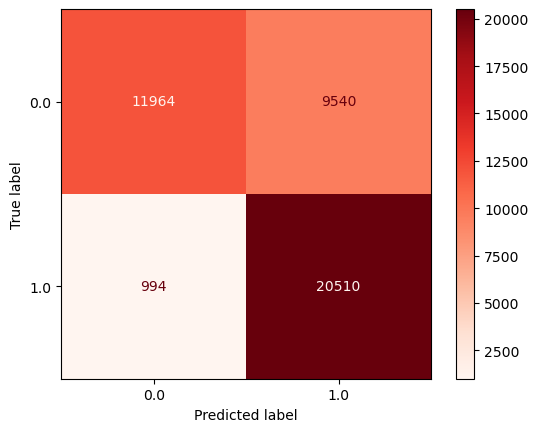

In [154]:
# confusion matrix for train
print('Train')
print(classification_report(y_train, y_pred_train))
print('Confusion Matrix:', ConfusionMatrixDisplay.from_estimator(grid_best, X_train, y_train, cmap='Reds'))

Test
              precision    recall  f1-score   support

         0.0       0.98      0.21      0.34     22979
         1.0       0.11      0.96      0.20      2389

    accuracy                           0.28     25368
   macro avg       0.55      0.58      0.27     25368
weighted avg       0.90      0.28      0.33     25368

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021800C14690>


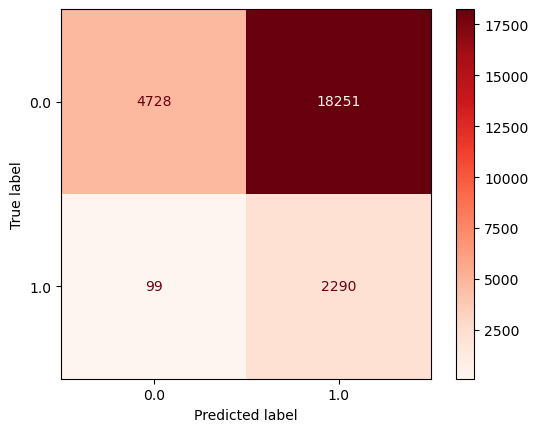

In [155]:
print('Test')
print(classification_report(y_test, y_pred_test))
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_estimator(grid_best, X_test, y_test, cmap='Reds'))

## 9. MODEL SAVING

In [156]:
with open("model.pkl", "wb") as f:
    pickle.dump(grid, f)

## 10. MODEL INFERENCE

Dilakukan pada -> **P1M2_fajar_muhammad_inf.ipynb**

## 11. CONCLUSION

----------------------------------------
- #### EDA Conclusion:

    Dengan melihat data yang telah diberikan mengenai penyakit jantung, status merokok, usia, jenis kelamin, dan Indeks Massa Tubuh (BMI), berikut adalah konklusi yang dapat ditarik:

    1. **Merokok dan Penyakit Jantung:**
    - Dalam data mengenai merokok, terlihat bahwa individu yang merokok (Smoker=1) cenderung memiliki jumlah kasus penyakit jantung yang lebih tinggi dibandingkan dengan non-perokok (Smoker=0).

    2. **Usia dan Penyakit Jantung:**
    - Analisis berdasarkan kelompok usia menunjukkan bahwa risiko penyakit jantung cenderung meningkat seiring bertambahnya usia. Kelompok usia yang lebih tua memiliki jumlah kasus penyakit jantung yang lebih tinggi.

    3. **Jenis Kelamin dan Penyakit Jantung:**
    - Dari data jenis kelamin, tidak dapat ditarik kesimpulan langsung, tetapi perlu diperhatikan bahwa distribusi jumlah kasus penyakit jantung dapat bervariasi antara pria (Sex=1) dan wanita (Sex=0).

    4. **BMI dan Penyakit Jantung:**
    - Terlihat bahwa individu dengan nilai BMI yang lebih tinggi cenderung memiliki jumlah kasus penyakit jantung yang lebih tinggi. Terdapat korelasi positif antara nilai BMI dan risiko penyakit jantung.

    5. **Kesimpulan Umum:**
    - Secara umum, faktor-faktor seperti merokok, usia, jenis kelamin, dan BMI dapat memiliki pengaruh terhadap risiko penyakit jantung.
    - Analisis lebih lanjut, seperti uji statistik, mungkin diperlukan untuk mengonfirmasi keterkaitan ini secara lebih rinci dan menyeluruh.

        Kesimpulan ini hanya bersifat umum dan didasarkan pada pengamatan visual terhadap data yang diberikan. Untuk mendapatkan pemahaman yang lebih mendalam dan validitas statistik, diperlukan analisis lebih lanjut dan penerapan metode statistik yang sesuai.

--------------------------------------
- #### Model Conclusion:

    1. **Fokus Metrik** 
    - Fokus utama adalah meminimalkan prediksi seseorang yang memiliki penyakit jantung sebagai tidak memiliki penyakit jantung (meminimalkan false negatives), sebaiknya difokuskan pada metrik Recall.
    Recall adalah rasio prediksi positif yang benar terhadap semua positif aktual. Dalam konteks model prediksi penyakit jantung, memaksimalkan recall berarti meminimalkan jumlah kasus aktual penyakit jantung yang salah diklasifikasikan sebagai bukan kasus.

    2. **Cross Validation**
    - model XGBoost yang crossvalidate mencapai rata-rata recall sekitar 0,815 dengan deviasi standar kecil, menunjukkan kinerja yang konsisten di berbagai fold. Recall pada set uji juga berada dalam rentang yang relatif sempit, menunjukkan stabilitas dalam kinerja model. Model terbaik diidentifikasi sebagai "XGBoost."

    3. **Hyperparameter Tuning**
        1. **Parameter Terbaik:**
            - 'xg__gamma': 5
            - 'xg__learning_rate': 0,2
            - 'xg__max_depth': 5
            - 'xg__min_child_weight': 1
            - 'xg__scale_pos_weight': 5
            - 'xg__subsample': 1

        2. **Skor Cross Validation Terbaik:**
            - Skor Terbaik: 0,953

        -  Hasil ini menunjukkan bahwa kombinasi parameter di atas mencapai skor validasi silang tertinggi, yaitu sekitar 95,4%. Skor ini mencerminkan kinerja model pada data pelatihan selama pencarian grid.

        - Parameter terbaik ini dapat berguna untuk mengonfigurasi model XGBoost agar mencapai kinerja optimal berdasarkan dataset dan masalah spesifik. Skor Cross Validation yang tinggi menunjukkan bahwa parameter yang dipilih efektif untuk tugas.

    4. **Model Evaluation**
        - Jika dilihat melalui Recall score, model ini dapat memprediksi False Negative dengan sangat baik dengan nilai Recall 0.95(train) dan 0.96(test).

        - Namun nilai-nilai pada metriks lainnya dapat terbilang cukup buruk contohnya nilai precision pada test (0.11). Hal ini mengartikan bahwa model ini condong memprediksi semua data sebagai 1 atau punya penyakit jantung.

        - Rekomendasinya adalah mencari data yang lebih baik dengan fitur-fitur yang lebih spesifik agar model dapat lebih mudah untuk memprediksi masing-masing kelas atau mencari dataset dengan persentase masing-masing kelas yang lebih seimbang. Pencarian model dan Hyperparameter lanjutan juga dapat kita lakukan untuk mendapat model yang paling sesuai untuk melakukan prediksi pada data ini, contohnya dapat mencoba menggunakan model Logistic Regression.